In [17]:
import dask.array as da
from dask_image.imread import imread
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
# Load the image using dask-image
image = imread('ashu.jpg')  # Replace with your image path
image = image.squeeze(axis=0)

# Check the shape of the image
print(f"Image shape: {image.shape}")

Image shape: (3000, 4000, 3)


In [13]:
chunk_size = (1024, 1024, 3)  # 256x256 pixels with 3 color channels

# Split the image into smaller chunks
chunks = [
    image[i:i + chunk_size[0], j:j + chunk_size[1]]
    for i in range(0, image.shape[0], chunk_size[0])
    for j in range(0, image.shape[1], chunk_size[1])
]

# Check the number of chunks created
print(f"Number of chunks: {len(chunks)}")

Number of chunks: 12


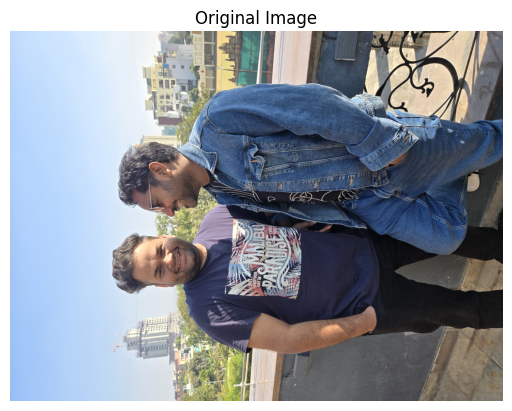

In [14]:
# Display the image using matplotlib
plt.imshow(image.compute())  # Convert Dask array to NumPy array
plt.axis('off')  # Hide axes
plt.title('Original Image')
plt.show()

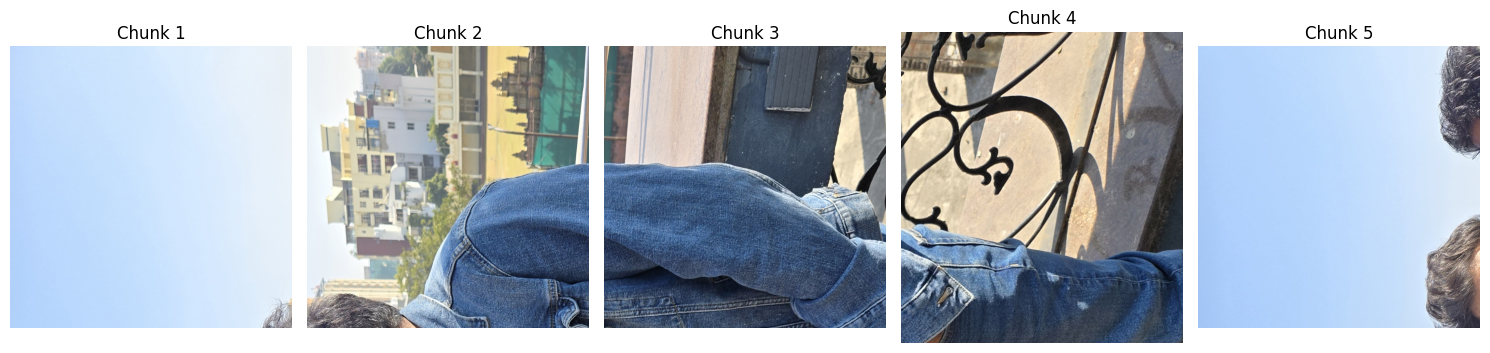

In [16]:
# Display the first few chunks
num_chunks_to_display = 5  # Number of chunks to display
fig, axes = plt.subplots(1, num_chunks_to_display, figsize=(15, 5))

for idx, ax in enumerate(axes):
    chunk = chunks[idx].compute()  # Convert Dask array to NumPy array
    ax.imshow(chunk)
    ax.axis('off')  # Hide axes
    ax.set_title(f'Chunk {idx + 1}')

plt.tight_layout()
plt.show()

In [18]:
# Convert the Dask array to a NumPy array and then to a PIL image
pil_image = Image.fromarray(image.compute().astype('uint8'))

# Display the image using PIL
pil_image.show(title='Original Image')

# Display individual chunks
chunk_size = (256, 256, 3)  # 256x256 pixels with 3 color channels
chunks = [
    image[i:i + chunk_size[0], j:j + chunk_size[1]]
    for i in range(0, image.shape[0], chunk_size[0])
    for j in range(0, image.shape[1], chunk_size[1])
]

# Display the first chunk
first_chunk = chunks[0].compute()  # Convert Dask array to NumPy array
chunk_image = Image.fromarray(first_chunk.astype('uint8'))
chunk_image.show(title='First Chunk')

/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmpzprnk24t.PNG'
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmpk4zmy39t.PNG'


/home/ubuntu/ashu-env/lib/python3.12/site-packages/pims/image_sequence.py:85: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  return imread(filename, **kwargs)


Shape of images: (3, 3000, 4000, 3)
Shape of grayscale images: (3, 3000, 4000)


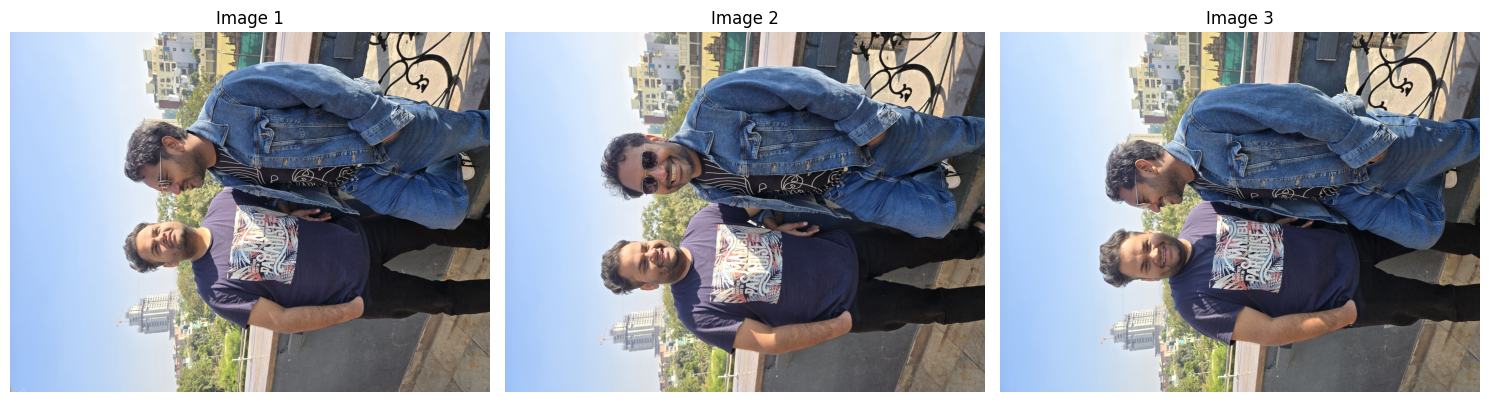

In [23]:
import dask.array as da
from dask_image.imread import imread
import matplotlib.pyplot as plt

# Load multiple images (e.g., all JPEGs in a folder)
# Replace '*.jpg' with the actual path or list of file paths
images1 = imread('./*.jpg')  # Shape: (N, height, width, 3), where N is the number of images

print(f"Shape of images: {images1.shape}")  # Example: (10, 3000, 4000, 3)

# Example: Convert all images to grayscale
def to_grayscale(image):
    return image.mean(axis=-1)  # Average across color channels

# Apply the function to each image in the batch
grayscale_images = da.stack([to_grayscale(image) for image in images1])

print(f"Shape of grayscale images: {grayscale_images.shape}")  # Example: (10, 3000, 4000)

# Display the first few images in the batch
num_images_to_display = min(4, images1.shape[0])  # Ensure we don't exceed the number of available images
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))

# If there's only one image, `axes` will not be an array, so we need to handle that case
if num_images_to_display == 1:
    axes = [axes]

# Display each image
for i, ax in enumerate(axes):
    image_to_display = images1[i].compute()  # Convert Dask array to NumPy array
    ax.imshow(image_to_display, cmap='gray' if image_to_display.ndim == 2 else None)
    ax.axis('off')
    ax.set_title(f'Image {i + 1}')

plt.tight_layout()
plt.show()

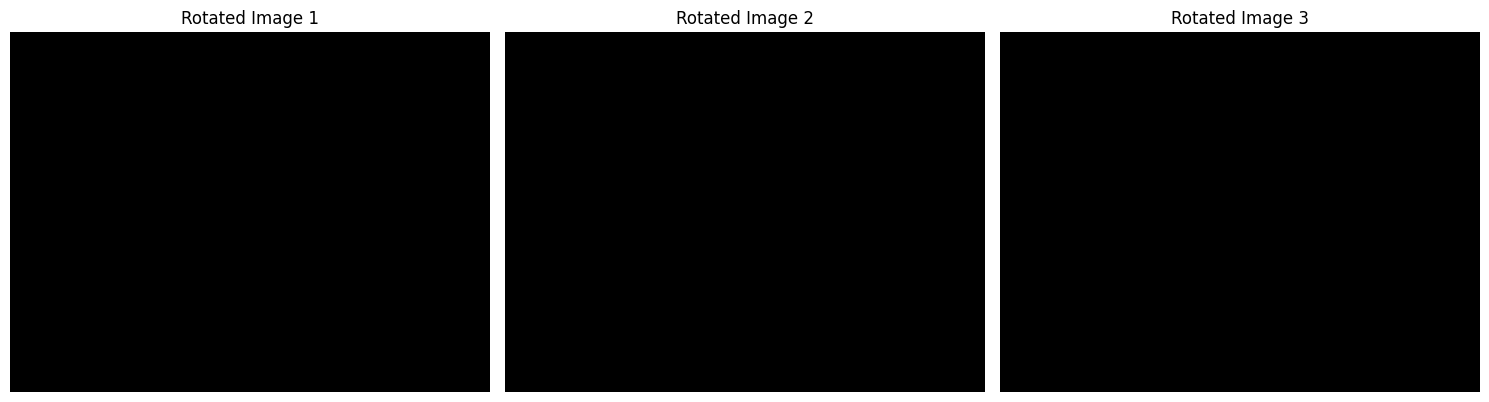

In [28]:
from scipy.ndimage import rotate

# Rotate each image by 45 degrees
def rotate_image(image):
    return rotate(image, angle=45, reshape=False)

# Apply rotation to all images
rotated_images = da.map_blocks(rotate_image, images1)

# Display rotated images
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(rotated_images[i].compute())
    ax.axis('off')
    ax.set_title(f'Rotated Image {i + 1}')
plt.tight_layout()
plt.show()

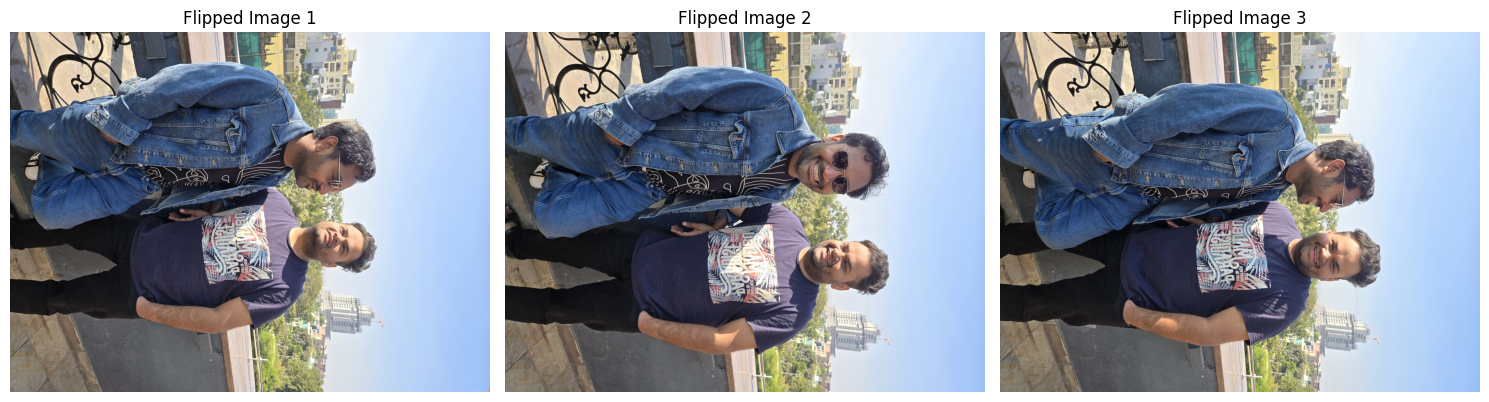

In [31]:
# Flip images horizontally
flipped_images = da.flip(images1, axis=2)

# Display flipped images
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(flipped_images[i].compute())
    ax.axis('off')
    ax.set_title(f'Flipped Image {i + 1}')
plt.tight_layout()
plt.show()

In [ ]:
import dask.array as da
from dask_image.imread import imread
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt
from dask import delayed, compute

# Load multiple images using Dask
images = imread('path_to_images/*.jpg')  # Replace with your image path
print(f"Shape of images: {images.shape}")  # Example: (N, height, width, 3), where N is the number of images

# Initialize MTCNN detector
detector = MTCNN()

# Function to detect faces using MTCNN
def detect_faces_mtcnn(image):
    # Convert Dask array to NumPy array
    image_np = image.compute()
    
    # Detect faces using MTCNN
    faces = detector.detect_faces(image_np)
    
    # Draw bounding boxes around detected faces
    for face in faces:
        x, y, w, h = face['box']
        cv2.rectangle(image_np, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
    return image_np

# Use Dask's delayed to parallelize face detection
delayed_results = [delayed(detect_faces_mtcnn)(image) for image in images]

# Compute the results in parallel
results = compute(*delayed_results)

# Display images with detected faces
num_images_to_display = min(4, len(results))  # Display up to 4 images
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))

# If there's only one image, `axes` will not be an array, so we need to handle that case
if num_images_to_display == 1:
    axes = [axes]

# Display each image with detected faces
for i, ax in enumerate(axes):
    ax.imshow(results[i])
    ax.axis('off')
    ax.set_title(f'Image {i + 1} with Faces')

plt.tight_layout()
plt.show()